# Exploratory Data Analysis
---


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# load data

bbox_df = pd.read_pickle('../data/interim/bbox_df.pkl')
data_entry_df = pd.read_pickle('../data/interim/data_entry_df.pkl')
patient_data = pd.read_pickle('../data/interim/patient_data.pkl')

In [3]:
# reset index  
flat_df = patient_data.reset_index()
flat_df.head()

,patient_id,follow_up_number,image_index,finding_labels,patient_age,patient_gender,view_position
0,1,0,00000001_000.png,Cardiomegaly,58,M,PA
1,1,1,00000001_001.png,Cardiomegaly|Emphysema,58,M,PA
2,1,2,00000001_002.png,Cardiomegaly|Effusion,58,M,PA
3,2,0,00000002_000.png,No Finding,81,M,PA
4,3,0,00000003_000.png,Hernia,81,F,PA


In [4]:
# total number of unique patients
data_entry_df["patient_id"].nunique()

30802

In [5]:
# checking dataset dimensions
print(f'Patient data shape: {flat_df.shape}')
print(f'Data entry shape: {data_entry_df.shape}')

Patient data shape: (112104, 7)
Data entry shape: (112104, 11)


In [6]:
# cheking data types
flat_df.info()
data_entry_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112104 entries, 0 to 112103
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   patient_id        112104 non-null  int64 
 1   follow_up_number  112104 non-null  int64 
 2   image_index       112104 non-null  object
 3   finding_labels    112104 non-null  object
 4   patient_age       112104 non-null  int64 
 5   patient_gender    112104 non-null  object
 6   view_position     112104 non-null  object
dtypes: int64(3), object(4)
memory usage: 6.0+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 112104 entries, 0 to 112119
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   image_index          112104 non-null  object 
 1   finding_labels       112104 non-null  object 
 2   follow_up_number     112104 non-null  int64  
 3   patient_id           112104 non-null  int64  
 4   

Average patient age: 46.09


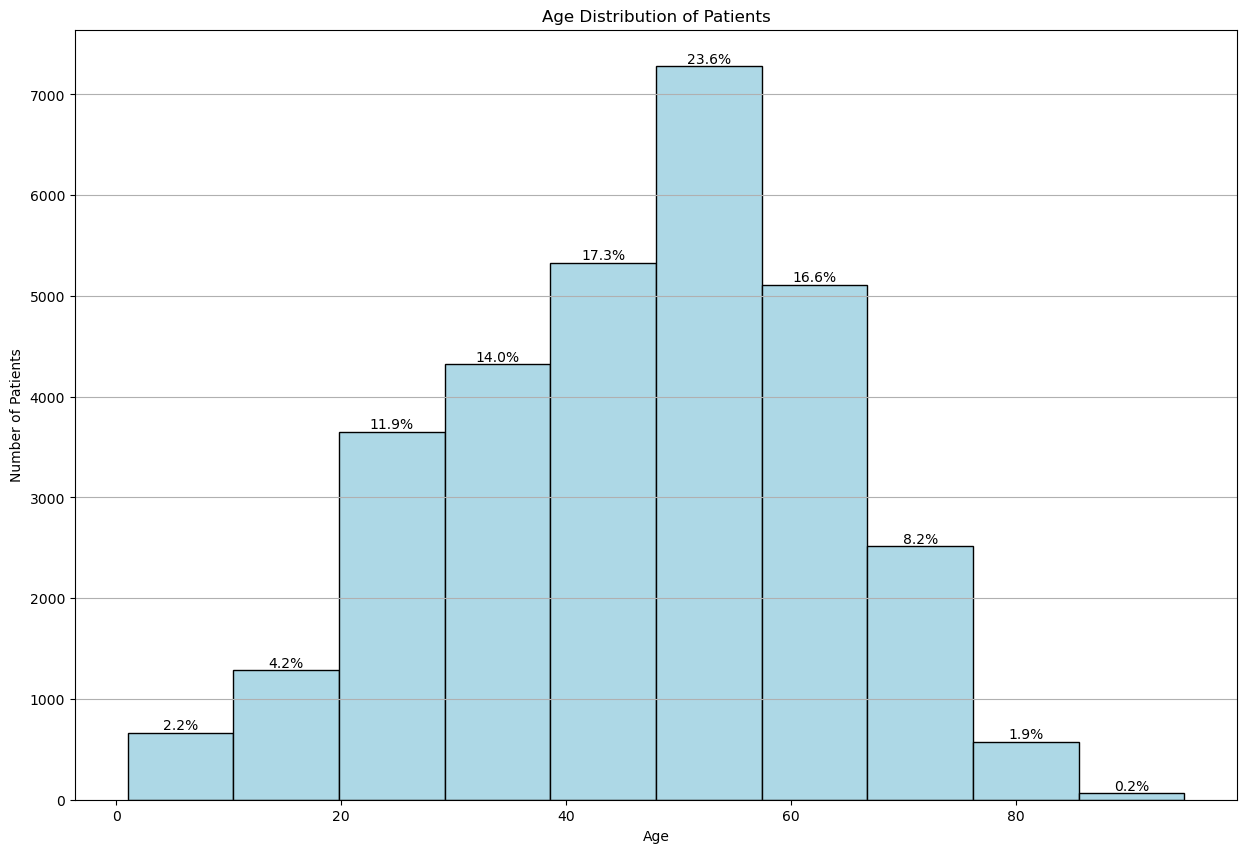

In [7]:
# age distribution of patients

# extracted the age of each unique patient
patient_ages = flat_df.groupby("patient_id")["patient_age"].first()

# calculated the average patient age
print(f'Average patient age: {patient_ages.mean().round(2)}')

# plotted histogram 
plt.figure(figsize=(15,10))
counts, bins, patches = plt.hist(patient_ages, bins=10, color="lightblue",edgecolor="black")
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Number of Patients")

total = counts.sum()
percentages = [f"{(c/total * 100):.1f}%" for c in counts]

plt.bar_label(patches, labels=percentages)
plt.grid(axis='y')
plt.show()

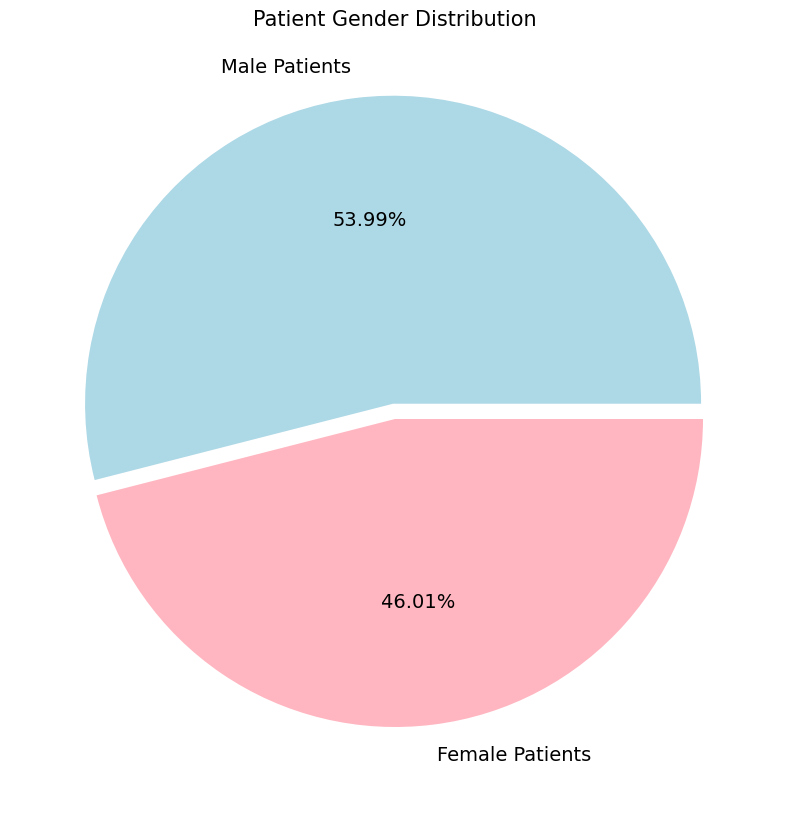

In [8]:
# Patient gender distribution

# extracted gender of each unique patient
patient_gender = flat_df.groupby("patient_id")["patient_gender"].first()
gender = patient_gender.value_counts()

# plot pie chart
plt.figure(figsize=(15,10))
plt.pie(gender.values, labels=["Male Patients", "Female Patients"], autopct="%.2f%%", explode=[0.05,0], colors=["lightblue", "lightpink"], textprops={"fontsize": 14})
plt.title("Patient Gender Distribution", fontsize=15)
plt.show()

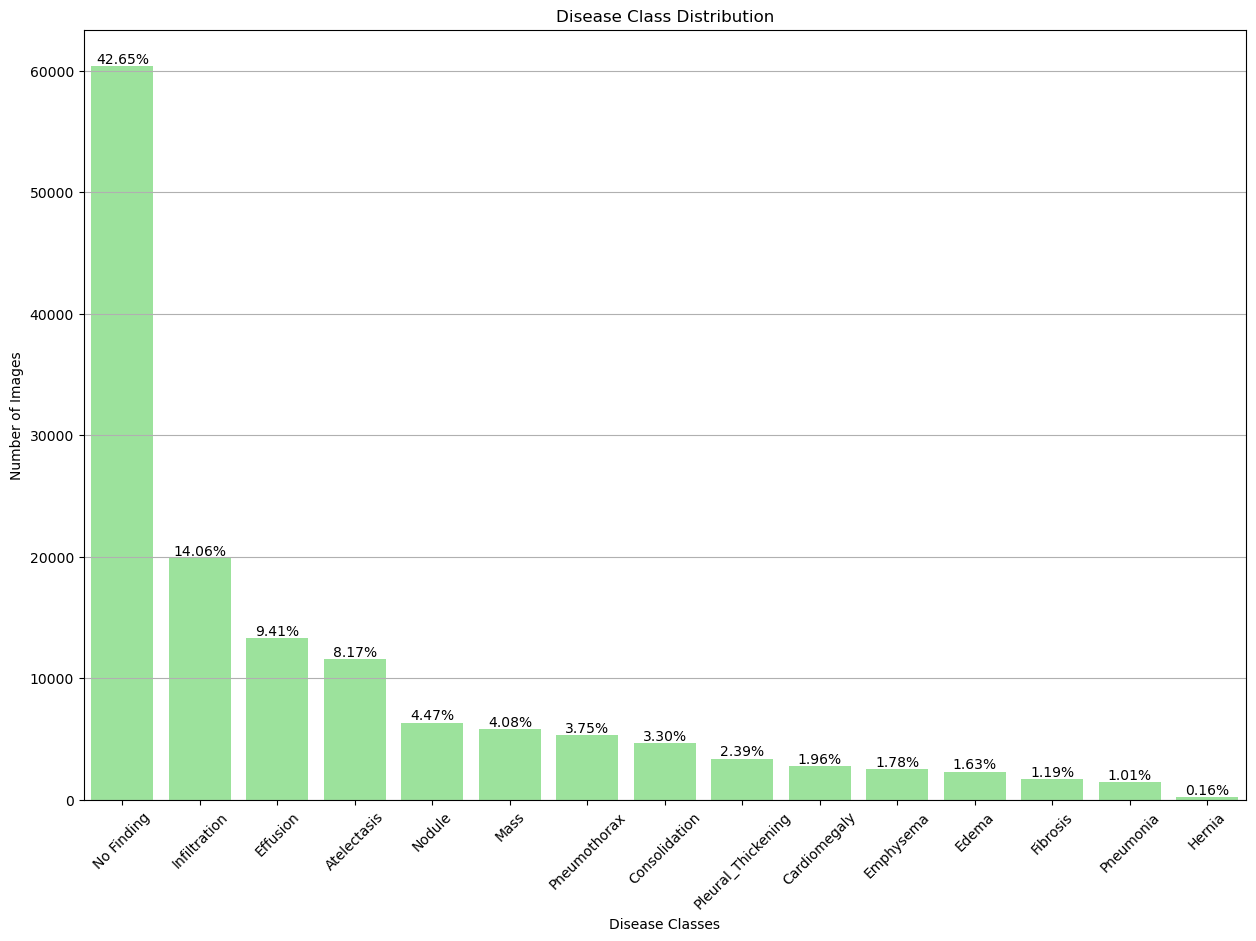

In [9]:
# Distribution of disease classes
# Did not extract for each unique patients so graph would account for new deseases from follow-ups 

labels_exploded = data_entry_df["finding_labels"].str.split('|').explode()
label_counts = labels_exploded.value_counts()

plt.figure(figsize=(15,10))
sns.barplot(x=label_counts.index, y=label_counts.values, color="lightgreen")
plt.xticks(rotation=45)
plt.title("Disease Class Distribution")
plt.xlabel("Disease Classes")
plt.ylabel("Number of Images")

total = label_counts.sum()

for index, count in enumerate(label_counts.values):
    percentage = (count/ total) * 100
    plt.text(index, count + 2, f'{percentage:.2f}%', ha='center', va='bottom')

plt.grid(axis='y')
plt.show()

The distribution of classes is left-skewed with a dominate class ("No Finding"). The gap between the top class the the next may have a large impact on model performance as models tend to bias the majority class while potentially not learning the classes with less labels such as the "Hernia" or "Pneumonia" class.

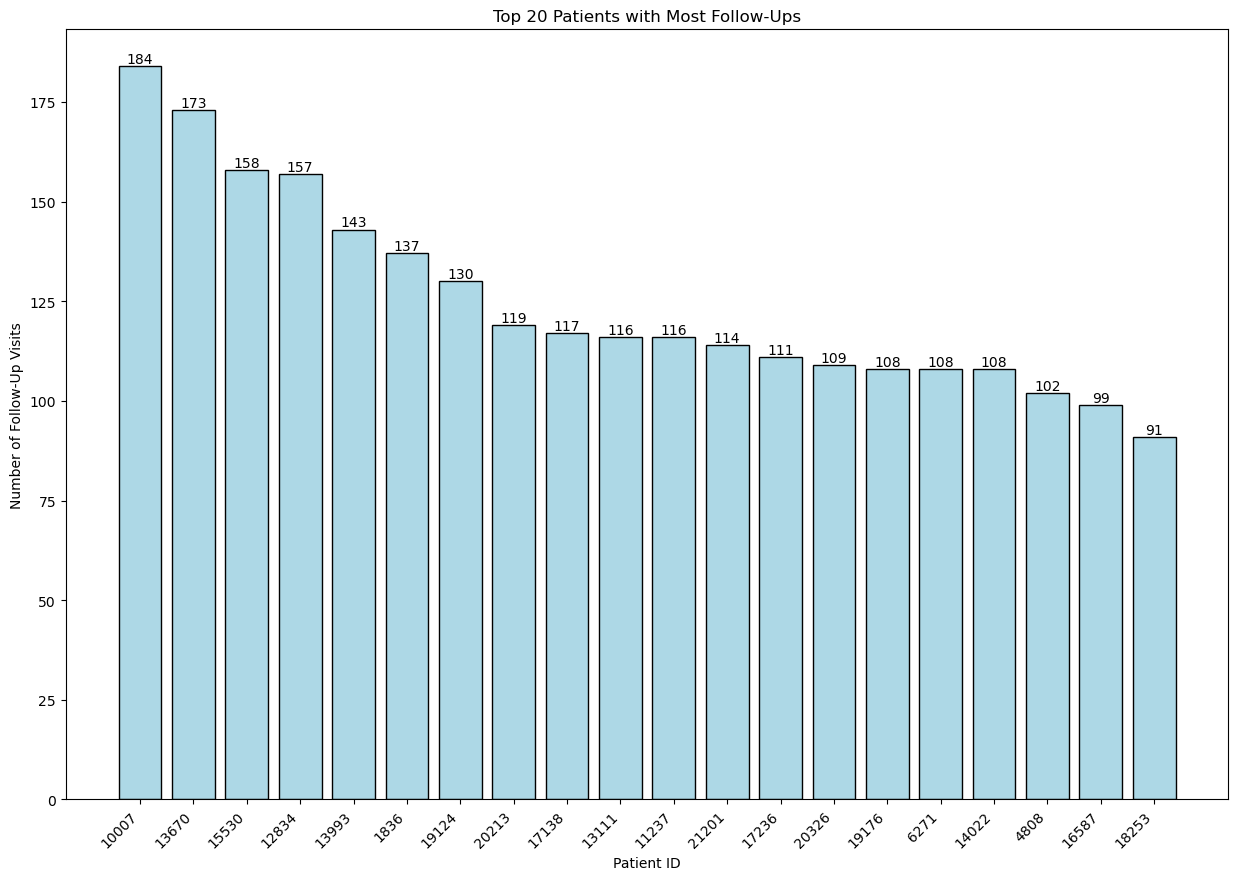

In [10]:
# Plotted a graph showing the 20 patients with the most amount of visits

most_follow_ups = patient_data.groupby(level="patient_id").size().sort_values(ascending=False).head(20)

plt.figure(figsize=(15,10))
bar_plot = plt.bar(most_follow_ups.index.astype(str), height=most_follow_ups.values, color="lightblue", edgecolor="black")
plt.ylabel("Number of Follow-Up Visits")
plt.xlabel("Patient ID")
plt.xticks(rotation=45, ha='right')
plt.title("Top 20 Patients with Most Follow-Ups")
plt.bar_label(bar_plot, labels=most_follow_ups.values, label_type="edge")
plt.show()